In [1]:
library("rpart")


In [7]:
credito <- read.csv(
    "../data/Credit.csv",
    sep = ",",
    na.strings = "",
    stringsAsFactors = TRUE
)
dim(credito)
head(credito, 10)


[1] 1000   21

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
1,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,⋯,'real estate',67,none,own,2,skilled,1,yes,yes,good
2,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,⋯,'real estate',22,none,own,1,skilled,1,none,yes,bad
3,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,⋯,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
4,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,⋯,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
5,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,⋯,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
6,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,⋯,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
7,'no checking',24,'existing paid',furniture/equipment,2835,500<=X<1000,>=7,3,'male single',none,⋯,'life insurance',53,none,own,1,skilled,1,none,yes,good
8,0<=X<200,36,'existing paid','used car',6948,<100,1<=X<4,2,'male single',none,⋯,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
9,'no checking',12,'existing paid',radio/tv,3059,>=1000,4<=X<7,2,'male div/sep',none,⋯,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good


In [19]:
# amostra <- sample(2, nrow(credito), replace = TRUE, prob = c(0.7, 0.3))
amostra <- sample(2, 1000, replace = TRUE, prob = c(0.7, 0.3))
credito_treino <- credito[amostra == 1, ]
credito_teste <- credito[amostra == 2, ]


In [21]:
arvore <- rpart(class ~ ., data = credito_treino, method = "class")
print(arvore)


n= 722 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 722 215 good (0.29778393 0.70221607)  
    2) checking_status=<0,0<=X<200 401 175 good (0.43640898 0.56359102)  
      4) duration>=22.5 184  80 bad (0.56521739 0.43478261)  
        8) savings_status=<100,100<=X<500,500<=X<1000 153  57 bad (0.62745098 0.37254902)  
         16) residence_since>=1.5 131  43 bad (0.67175573 0.32824427)  
           32) purpose='domestic appliance','new car',business,education,radio/tv 77  17 bad (0.77922078 0.22077922) *
           33) purpose='used car',furniture/equipment,other,repairs 54  26 bad (0.51851852 0.48148148)  
             66) personal_status='female div/dep/mar' 13   2 bad (0.84615385 0.15384615) *
             67) personal_status='male div/sep','male mar/wid','male single' 41  17 good (0.41463415 0.58536585)  
              134) employment=<1,>=7,4<=X<7 22   8 bad (0.63636364 0.36363636) *
              135) employment=1<=X<4,unemployed 19   3 good (0.

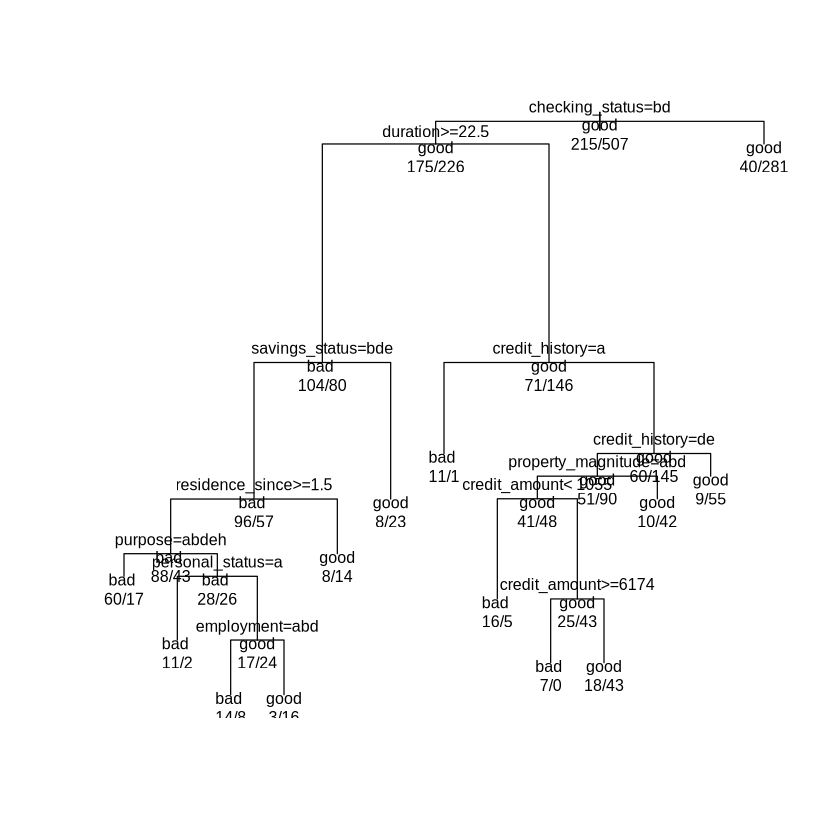

In [24]:
plot(arvore)
text(arvore, use.n = TRUE, all = TRUE, cex = 0.8)


In [25]:
teste <- predict(arvore, newdata = credito_teste)
head(teste)


,bad,good
7,0.1246106,0.8753894
15,0.2950820,0.7049180
29,0.1923077,0.8076923
30,0.7792208,0.2207792
32,0.1578947,0.8421053
34,0.1246106,0.8753894


In [26]:
cred <- cbind(credito_teste, teste)
head(cred)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,bad,good
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>
7,'no checking',24,'existing paid',furniture/equipment,2835,500<=X<1000,>=7,3,'male single',none,⋯,none,own,1,skilled,1,none,yes,good,0.1246106,0.8753894
15,<0,15,'existing paid','new car',1403,<100,1<=X<4,2,'female div/dep/mar',none,⋯,none,rent,1,skilled,1,none,yes,good,0.2950820,0.7049180
29,0<=X<200,7,'existing paid',radio/tv,2415,<100,1<=X<4,3,'male single',guarantor,⋯,none,own,1,skilled,1,none,yes,good,0.1923077,0.8076923
30,<0,60,'delayed previously',business,6836,<100,>=7,3,'male single',none,⋯,none,own,2,skilled,1,yes,yes,bad,0.7792208,0.2207792
32,<0,24,'existing paid',furniture/equipment,4020,<100,1<=X<4,2,'male single',none,⋯,stores,own,1,skilled,1,none,yes,good,0.1578947,0.8421053
34,'no checking',12,'critical/other existing credit',business,1264,'no known savings',>=7,4,'male single',none,⋯,none,rent,1,'unskilled resident',1,none,yes,good,0.1246106,0.8753894


In [28]:
cred["Result"] <- ifelse(cred$bad > 0.5, "bad", "good")
head(cred)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,bad,good,Result
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>
7,'no checking',24,'existing paid',furniture/equipment,2835,500<=X<1000,>=7,3,'male single',none,⋯,own,1,skilled,1,none,yes,good,0.1246106,0.8753894,good
15,<0,15,'existing paid','new car',1403,<100,1<=X<4,2,'female div/dep/mar',none,⋯,rent,1,skilled,1,none,yes,good,0.2950820,0.7049180,good
29,0<=X<200,7,'existing paid',radio/tv,2415,<100,1<=X<4,3,'male single',guarantor,⋯,own,1,skilled,1,none,yes,good,0.1923077,0.8076923,good
30,<0,60,'delayed previously',business,6836,<100,>=7,3,'male single',none,⋯,own,2,skilled,1,yes,yes,bad,0.7792208,0.2207792,bad
32,<0,24,'existing paid',furniture/equipment,4020,<100,1<=X<4,2,'male single',none,⋯,own,1,skilled,1,none,yes,good,0.1578947,0.8421053,good
34,'no checking',12,'critical/other existing credit',business,1264,'no known savings',>=7,4,'male single',none,⋯,rent,1,'unskilled resident',1,none,yes,good,0.1246106,0.8753894,good


In [30]:
confusao <- table(cred$class, cred$Result)
confusao


      
       bad good
  bad   28   57
  good  16  177

In [31]:
taxa_acerto <- (confusao[1] + confusao[4]) / sum(confusao)
taxa_acerto


[1] 0.7374101